In [1]:
!pip install geojson geopandas plotly

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 866.9 kB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 578.3 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 1.4 MB/s eta 0:00:001.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 1.4 MB/s eta 0:00:001.4 MB/s eta 0:00:01


In [2]:
!pip install ipyleaflet

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 692.5 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 1.7 MB/s eta 0:00:00


In [19]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
import seaborn as sns
import pyspark.sql.functions as F
import matplotlib.pyplot as plt


In [5]:
# Create a SparkSession
spark = SparkSession.builder \
    .appName("DataTaxis")\
    .getOrCreate()

23/05/23 14:59:57 WARN Utils: Your hostname, charme-VivoBook-ASUSLaptop-X512JA-X512JA resolves to a loopback address: 127.0.1.1; using 192.168.1.124 instead (on interface wlo1)
23/05/23 14:59:57 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/23 15:00:08 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [17]:
#Creating Parquet files with specified partitioning
df= spark.read.parquet("yellow_tripdata_2019-03.parquet")
print(df.columns)
partition_column = "column_name"

# Repartition the DataFrame by the specified column into 'num_partitions'
num_partitions = 10
repartitioned_df = df.repartition(num_partitions, partition_column)

# Write the DataFrame as Parquet files
repartitioned_df.write.partitionBy(partition_column).parquet("yellow_tripdata_2019-03.parquet")


['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


AnalysisException: cannot resolve 'column_name' given input columns: [DOLocationID, PULocationID, RatecodeID, VendorID, airport_fee, congestion_surcharge, extra, fare_amount, improvement_surcharge, mta_tax, passenger_count, payment_type, store_and_fwd_flag, tip_amount, tolls_amount, total_amount, tpep_dropoff_datetime, tpep_pickup_datetime, trip_distance];
'RepartitionByExpression ['column_name], 10
+- Relation [VendorID#222L,tpep_pickup_datetime#223,tpep_dropoff_datetime#224,passenger_count#225,trip_distance#226,RatecodeID#227,store_and_fwd_flag#228,PULocationID#229L,DOLocationID#230L,payment_type#231L,fare_amount#232,extra#233,mta_tax#234,tip_amount#235,tolls_amount#236,improvement_surcharge#237,total_amount#238,congestion_surcharge#239,airport_fee#240] parquet


In [7]:
#Modifying the number of partitions when (re)-creating Parquet files

num_partitions = 5
repartitioned_df = df.repartition(num_partitions)

# Write the DataFrame as Parquet files
repartitioned_df.write.parquet("yellow_tripdata_2019-03.parquet")


AnalysisException: path file:/home/charme/Téléchargements/Taxis_NY-master (1)/Taxis_NY-master/yellow_tripdata_2019-03.parquet already exists.

In [8]:
#1. To find the number of partitions of a DataFrame, we can use the rdd.getNumPartitions() method.

num_partitions = df.rdd.getNumPartitions()
num_partitions

8

In [9]:
#2. Yes, it is possible to tune the number of partitions at loading time. When reading data from Parquet files, we can use the repartition() method to adjust the number of partitions.

num_partitions = 5
df = spark.read.parquet("yellow_tripdata_2019-03.parquet").repartition(num_partitions)
df

DataFrame[VendorID: bigint, tpep_pickup_datetime: timestamp, tpep_dropoff_datetime: timestamp, passenger_count: double, trip_distance: double, RatecodeID: double, store_and_fwd_flag: string, PULocationID: bigint, DOLocationID: bigint, payment_type: bigint, fare_amount: double, extra: double, mta_tax: double, tip_amount: double, tolls_amount: double, improvement_surcharge: double, total_amount: double, congestion_surcharge: double, airport_fee: int]

In [ ]:
#3. We  may want to modify the number of partitions when (re)-creating Parquet files for performance optimization.
# By adjusting the number of partitions, we can control the data distribution and parallelism, potentially improving 
# query execution time and resource utilization. Additionally, it allows us to align the partitions with specific 
# partitioning columns, enabling efficient partition pruning during queries, which can significantly speed up data retrieval.

In [ ]:
# Investigate (at least) one month of data in 2019
long_min = -74.10
long_max = -73.70
lat_min = 40.58
lat_max = 40.90


#1.Filter the 2019 data within the specified boundaries and count the number of trips for each value of passenger_count

df_2019=df[(df['pickup_longitude'] >= long_min) & (df['pickup_longitude'] <= long_max) &
               (df['pickup_latitude'] >= lat_min) & (df['pickup_latitude'] <= lat_max) &
               (df['dropoff_longitude'] >= long_min) & (df['dropoff_longitude'] <= long_max) &
               (df['dropoff_latitude'] >= lat_min) & (df['dropoff_latitude'] <= lat_max)]


df_2019.na.drop()

# Count the number of trips for each value of passenger_count
passenger_counts = df_2019['passenger_count'].value_counts()

# Plot the counts
plt.figure(figsize=(8, 6))
sns.barplot(x=passenger_counts.index, y=passenger_counts.values)
plt.xlabel('Passenger Count')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Passenger Count (2019)')
plt.show()

In [ ]:
#2. Investigate trips with zero passengers:

# ----Trips with zero passengers might indicate that 
# the taxi was dispatched but no passengers boarded.

# ---- To explore further, we can analyze the other 
# attributes of these trips, such as the trip distance,
# duration, pickup/dropoff locations, and timestamps.


In [12]:
#3. Investigate trips with more than six passengers

# ---- Trips with more than six passengers are relatively rare and may indicate
# instances where multiple people exceeded the usual passenger limit or groups 
# using shared rides.

# ---- Similar to trips with zero passengers, we can analyze other attributes 
# of these trips to understand their characteristics and potential anomalies.

In [ ]:
#4. Find the largest distance traveled during the month

# To find the largest distance traveled, we can calculate 
# the trip distance for each trip in the filtered data and 
# find the maximum value

#

largest_distance = df_2019['trip_distance'].max()
print("Largest distance traveled: {:.2f} miles".format(largest_distance))


In [ ]:
# 5.Plot the distribution of trip_distance for non-zero distances less than 30 miles

# Filter non-zero trip distances and distances less than 30 miles
filtered_distances = df_2019[(df_2019['trip_distance'] > 0) & (df_2019['trip_distance'] < 30)]['trip_distance']

# Plot the distribution using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(filtered_distances, bins=30, kde=True)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Count')
plt.title('Distribution of Trip Distance (2019)')
plt.show()


In [22]:
df.columns

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

In [25]:
df.explain()

== Physical Plan ==
*(1) ColumnarToRow
+- FileScan parquet [VendorID#222L,tpep_pickup_datetime#223,tpep_dropoff_datetime#224,passenger_count#225,trip_distance#226,RatecodeID#227,store_and_fwd_flag#228,PULocationID#229L,DOLocationID#230L,payment_type#231L,fare_amount#232,extra#233,mta_tax#234,tip_amount#235,tolls_amount#236,improvement_surcharge#237,total_amount#238,congestion_surcharge#239,airport_fee#240] Batched: true, DataFilters: [], Format: Parquet, Location: InMemoryFileIndex(1 paths)[file:/home/charme/Téléchargements/Taxis_NY-master (1)/Taxis_NY-master/..., PartitionFilters: [], PushedFilters: [], ReadSchema: struct<VendorID:bigint,tpep_pickup_datetime:timestamp,tpep_dropoff_datetime:timestamp,passenger_c...




2. Compare the Analyzed Logical Plan and Optimized Logical Plan:
    Analyzed Logical Plan: This plan represents the logical operations after the analysis phase, where Spark resolves references, applies type checking, and performs other logical optimizations.
    Optimized Logical Plan: This plan represents the logical operations after further optimization, such as predicate pushdown, column pruning, or constant folding.

3-1. Compare the Physical Plan with the Optimized Logical Plan:
    Physical Plan: This plan describes the actual execution strategy that Spark will use to process the query. It includes details about how the data will be read, transformed, and distributed across the worker nodes.
3-2. Keywords and concepts in the Physical Plan that you would not expect in an RDBMS include:
    Shuffle: This keyword indicates data shuffling, which involves redistributing data across partitions or nodes, often required for operations like joins or aggregations.
    Exchange: This keyword represents the exchange of data between partitions or nodes.
    Sort: This keyword indicates sorting operations performed during the query execution.
    Broadcast: This keyword represents the broadcasting of small data to all worker nodes, typically used in join operations.
    Code generation: This indicates that Spark generates code dynamically for specific operations to improve performance.
    In an RDBMS, the physical plan might involve index scans, table scans, join algorithms, and disk-based operations. The specific keywords and concepts may vary depending on the RDBMS implementation.

4. Tasks in Spark refer to the individual units of work performed on the data. Each task processes a subset of the data and is executed on a single partition of a stage. The number of tasks within each stage may vary depending on the size of the data and the available resources. You can find the number of tasks for each stage in the Spark UI under the "Stages" tab.

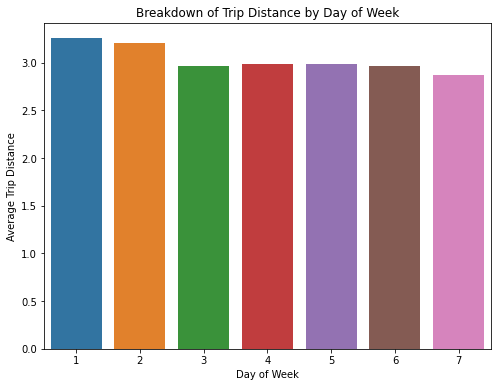

In [20]:
#1.To break down the trip distance distribution for each day of the week

# df may be replace by df_2019

# Extract the day of the week from the pickup datetime
df_with_day_of_week = df.withColumn('pickup_day_of_week', F.dayofweek('tpep_pickup_datetime'))

# Group by day of the week and calculate the distribution of trip distances
distance_breakdown = df_with_day_of_week.groupBy('pickup_day_of_week').agg(F.mean('trip_distance').alias('avg_distance'))

# Convert the result to a Pandas DataFrame for plotting
distance_breakdown_pd = distance_breakdown.toPandas()

# Plot the breakdown of trip distance
plt.figure(figsize=(8, 6))
sns.barplot(x='pickup_day_of_week', y='avg_distance', data=distance_breakdown_pd)
plt.xlabel('Day of Week')
plt.ylabel('Average Trip Distance')
plt.title('Breakdown of Trip Distance by Day of Week')
plt.show()


In [23]:
#2. To count the number of distinct pickup locations, we can use the following code:

distinct_pickup_locations = df.select('PUlocationID').distinct().count()
print("Number of distinct pickup locations:", distinct_pickup_locations)


Number of distinct pickup locations: 261


In [24]:
#3. To compute and display tips and profits as a function of the pickup location, we can use the following code:

tips_profits_by_location = df.groupBy('PUlocationID').agg(F.sum('tip_amount').alias('total_tips'), F.sum('extra').alias('total_profits'))

# Display the results
tips_profits_by_location.show()


+------------+------------------+------------------+
|PUlocationID|        total_tips|     total_profits|
+------------+------------------+------------------+
|          26|            165.38|            395.75|
|          29|             56.83|            141.25|
|          65|20356.180000000073|           8173.65|
|         191|36.089999999999996|             424.5|
|         222|              34.9|             401.0|
|         243|2214.0100000000007|             874.0|
|          54| 558.3500000000001|            147.25|
|          19| 97.63999999999999|             152.5|
|         113|243919.94999999137|          157734.5|
|         112|4622.1900000000005|           1677.05|
|         167|             90.62|             256.0|
|         155|              58.0|             315.0|
|         237| 530634.1000000244|398240.79999999993|
|         241|            128.49|            159.75|
|         198|331.59999999999997|             233.5|
|          22|237.54000000000002|             